----

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos. 

Mi plan es importar todas las librerias necesarias que incluye a pandas la cual me permite leer los datos tipo dataframe usando Pd.read_csv() ya que al verificar los tipos de archivo, se evidencia que todos los datos son un archivo .csv, adicionalmente al verificar de forma inicial los datos, vemos que están separados por ";" por lo que agregamos el parametro sep=";" al leer los archivos de datos.
luego de leer los archivos de datos, nos vamos uno a uno llamando a info() para verificar la cantidad de columnas, si hay columnas con datos nulos y que tipos de datos se tienen en cada columna.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_instacart_orders=pd.read_csv("instacart_orders.csv", sep=';')
df_products=pd.read_csv("products.csv", sep=';')
df_aisles=pd.read_csv("aisles.csv", sep=';')
df_departments=pd.read_csv("departments.csv", sep=';')
df_order_products=pd.read_csv("order_products.csv", sep=';')

In [4]:
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Como conclusiones intermedias, puedo ver que los dataframes como objeto de datos solo presentan 1 columna pero al verificar los datos se tiene que en una columna hay información de varias columnas como es el caso de el dataframe para Order_products el cual cuenta en teoria con solo una columna al llamar el metodo info() pero al verificar el contenido de la columna se tiene que hay información del departemnt_id y el department, dicha información está separa por ;.Adicionalemnte en los datos verificamos que no se cuenta con valores nulos en los DataFrames de forma preliminar, pero luego de verificar que el separador de los datos es ";", se adicionó este parametro al leer los datos para que me muestre todas las columnas existentes. al llevar a cabo esto evidenció que hay algunos dataframe que presentan columnas con valores nulos como es el caso de df_products que en la columna de product_name presenta valores nulos y para el caso del dataframe df_instacart tambien se identifican valores nulos en la columna days_since_prior_order.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para el preprocesamiento de los datos inicalmente verificamos que todas las columnas de ID en los 5 conjuntos de datos correponsan con el tipo de dato numero entero, está información la podemos obtener de la herramienta info().
Para verificar los valores ausentes y completarlos, inicialmente verificaría la herramienta info() la cual me permite ver que columnas del dataframe contienen valores ausentes, luego verificaría la descripción y el tipo de datos de la columna con valores ausentes para luego ingresar valores que ayuden al procesamiento de los datos.
para identificar valores duplicados y eliminarlos, inicialmente verificaría con la herramienta duplicated() si se evidencian filas enteras de duplicados y luego eliminaria dichos duplicados con el metodo drop_duplicates()

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(df_instacart_orders[df_instacart_orders.duplicated()])

print()

print(df_instacart_orders.duplicated().sum())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Para verificar si el dataFrame tiene valores duplicados hago uso de .duplicated() y .sum() para mostrar los duplicados y el numero total de filas enteras duplicadas.

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si tenemos lineas duplicadas (15 en total), en este caso los datos que tienen en comun provienen de las columnas order_dow que corresponde al día de la semana en el cual se hizo el pedido (miercoles) y Order_hour_of_day que corresponde a la hora en la que se hizo el pedido (2 am).

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

In [10]:
print(df_instacart_orders[(df_instacart_orders["order_dow"]==3) & (df_instacart_orders["order_hour_of_day"]==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? 

Este resultado sugiere que los pedidos que se hicieron el miercoles a las 2:00 am fueron en total 121 pedidos pero teniendo en cuenta que se verificaron 15 datos duplicados, el total de pedidos de ese día a esa hora son 106. Puede que el día miercoles a las 2 am se haya presentado un fallo en el sistema que generó duplicados de algunos pedidos.

In [11]:
# Elimina los pedidos duplicados

In [12]:
df_instacart_orders=df_instacart_orders.drop_duplicates()

Con el uso del metodo drop_duplicates() eliminamos los pedidos duplicados.

In [13]:
# Vuelve a verificar si hay filas duplicadas

In [14]:
print(df_instacart_orders.duplicated().sum())

0


Luego de llamar el metodo drop_duplicates() ya no se evidencian filas enteras de duplicados en el DataFrame df_instacart_orders

In [15]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


In [16]:
print(df_instacart_orders.duplicated(subset="order_id").sum())

0


No se cuenta con valores duplicados en la columna order_id del DataFrame df_instcart_orders, lo que significa que no hay pedidos duplicados ya que cada pedido tiene un id diferente.

Al verificar unicamente si hay IDs duplicados de pedidos, evidenciamos que no se tienen valores duplicados. Al verificar las columnas del Datafrmae df_instacart_orders evidenciamos que la unica columna que no deberia contener duplicados es order_id ya que es un valor unico para cada pedido o fila por lo que se hay duplicados, debemos eliminarlos, para el caso de las otras columnas, sus valores si pueden repetirse pero para "order_id" no es lógico.

### `products` data frame

In [17]:
# Verifica si hay filas totalmente duplicadas

In [18]:
print(df_products.duplicated().sum())

0


Para el caso del Data frame df_products, se verificó de igual forma si se tenía evidencia de filas completamente duplicadas pero el resultado fue que no se encuentran filas completamente duplicadas en el Dataframe

In [19]:
# Revisa únicamente si hay ID de departamentos duplicados

In [20]:
print(df_products.duplicated(subset="department_id").sum())

49673


Al verificar si se cuenta con Id de departamentos duplicados, evidenciamos que hay 49673 ID de departamentos duplicados de un total de 49694 teniendo en cuenta la información del metodo info(). En este sentido tenemos un total de 21 valores de departamento ID que se repiten.

In [21]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

In [22]:
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products.duplicated(subset='product_name').sum())

1361


Al verificar si se tienen nombres duplicados de productos se tiene que hay 1361 valores duplicados en la columna de los nombres de productos

In [23]:
# Revisa si hay nombres duplicados de productos no faltantes

In [24]:
print(df_products[df_products.duplicated(subset=['product_name']) & df_products['product_name'].notna()])

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Al correr la linea de codigo anterior verificamos que hay 104 filas en cuya columna "product_name" se evidencian valores duplicados que no corresponden con valores nulos, ya que en esta fila se presentan valores nulos.

In [25]:
print(df_products[df_products["product_name"]=="GREEN TEA WITH GINSENG AND HONEY"])

       product_id                      product_name  aisle_id  department_id
2037         2038  GREEN TEA WITH GINSENG AND HONEY        94              7
5455         5456  GREEN TEA WITH GINSENG AND HONEY        96             20
19813       19814  GREEN TEA WITH GINSENG AND HONEY        94              7


En la linea de codigo anterior podemos ver que el producto "GREEN TEA WITH GINSENG AND HONEY" aparece en tres filas con diferente valor en product_id.

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas

In [27]:
print(df_departments.duplicated().sum())

0


Para el caso del Data frame df_departments, se verificó de igual forma si se tenía evidencia de filas completamente duplicadas pero el resultado fue que no se encuentran filas completamente duplicadas en el Dataframe

In [28]:
# Revisa únicamente si hay IDs duplicadas de productos

In [29]:
print(df_departments.duplicated(subset="department_id").sum())

0


Para el caso de la columna "department_id" del Dataframe df_departments, al llamar a duplicated, no se tiene evidencia de valores duplicados en dicha columna, en este sentido cada valor de departemnt_id es unico.

In [30]:
print(df_departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


Cómo se ve en la línea de codigo anterior, el Dataframe tiene un total de 21 filas con 2 columnas en las cuales se presentan los departamentos descritos por un id y por el nombr del departamento.

### `aisles` data frame

In [31]:
# Revisa si hay filas totalmente duplicadas

In [32]:
print(df_aisles.duplicated().sum())

0


Para el caso del Data frame df_aisles, se verificó de igual forma si se tenía evidencia de filas completamente duplicadas pero el resultado fue que no se encuentran filas completamente duplicadas en el Dataframe

In [33]:
# Revisa únicamente si hay IDs duplicadas de pasillos

In [34]:
print(df_aisles.duplicated(subset="aisle_id").sum())

0


Para el caso de la columna "aisle_id" del Dataframe df_aisles, al llamar a duplicated, no se tiene evidencia de valores duplicados en dicha columna, en este sentido cada valor de aisle_id es unico. Se tiene un caso identico al del df_depatments, en el cual cada fila tiene un valor que no se repite de id y de nombre.

### `order_products` data frame

In [35]:
# Revisa si hay filas totalmente duplicadas

In [36]:
print(df_order_products.duplicated().sum())

0


Para el caso del Data frame df_order_products, se verificó de igual forma si se tenía evidencia de filas completamente duplicadas pero el resultado fue que no se encuentran filas completamente duplicadas en el Dataframe

In [37]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

In [38]:
df_order_products.groupby(["order_id","product_id"],as_index=False).agg(conteos=("reordered","count")).query("conteos>1")

,order_id,product_id,conteos


El posible duplicado engañoso que se consideró es que se encuentre para un mismo order_id un valor duplicado de product_id, en este caaso con la linea de codigo anterior verificamos que no hay valores repetidos de product_id para un mismo order_id.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [39]:
# Encuentra los valores ausentes en la columna 'product_name'

In [40]:
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [41]:
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Al llamar isna() en nuestro DataFrame, evidenciamos que la columna product_name tiene 1258 valores ausentes. Para el caso de las otras columnas no se tienen valores ausentes.

In [42]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

In [43]:
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Al generar la linea de codigo que filtra el DataFrame df_products en relación con las filas donde la columna "product_name" es nula y la columna "aisle_id" es igual a 100, evidenciamos que la cantidad de filas es 1258, la misma cantidad de filas resultante al imprimir el Dataframe filtrado donde las filas mostradas se relacionan con los valores nulos de la columna "product_:name". En este sentido se concluye que todos los nombre de los productos ausentes están rlacionados con el pasillo con ID igual a 100

In [44]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

In [45]:
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id']==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Al generar la linea de codigo que filtra el DataFrame df_products en relación con las filas donde la columna "product_name" es nula y la columna "department_id" es igual a 21, evidenciamos que la cantidad de filas es 1258, la misma cantidad de filas resultante al imprimir el Dataframe filtrado donde las filas mostradas se relacionan con los valores nulos de la columna "product_:name". En este sentido se concluye que todos los nombre de los productos ausentes están rlacionados con el departamento con id 21

In [46]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

In [47]:
print(df_aisles[df_aisles["aisle_id"]==100])

    aisle_id    aisle
99       100  missing


Al usar los datos del DataFrame aisle y revisar el valor asociado al id 100, evidenciamos que es "missing" que corresponde a faltante. De acuerdo con lo anterior, el tipo de producto no se agrego ya que se encuentra en un un pasillo faltante osea que no se encuentra en la tienda.

In [48]:
print(df_departments[df_departments["department_id"]==21])

    department_id department
20             21    missing


Al usar los datos del DataFrame department y revisar el valor asociado al id 21, evidenciamos que es "missing" que corresponde a faltante. De acuerdo con lo anterior, el tipo de producto no se agrego ya que se encuentra asociado a un departamento faltante osea que no se encuentra en la tienda.

In [49]:
# Completa los nombres de productos ausentes con 'Unknown'

In [50]:
df_products['product_name'] = df_products['product_name'].fillna('unknown')

Con la anterior linea de codigo usamos .fillna() para cambiar los valores ausentes de la columna "product_name" del Dataframe df_products por el valor "unknown"

### `orders` data frame

In [51]:
# Encuentra los valores ausentes

In [52]:
print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Al llamar isna() en nuestro DataFrame, evidenciamos que la columna days_since_prior_order tiene 28817 valores ausentes. Para el caso de las otras columnas no se tienen valores ausentes.

In [53]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

In [54]:
print(df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (df_instacart_orders['order_number']==1)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Al filtrar el DataFrame a partir de 2 condiciones, de las cuales la primera corresponde a las filas del Dataframe donde la columna "days_since_prior_order" tiene valores nulos y la segunda es cuando la columna "order_number" tenga un valor igual a 1, nos da como resultado un total de 28817 filas. El numero de filas corresponde con el numero de valores ausentes de la columna "days_since_prior_order", en sete sentido se concluye qye todos los valores nulos de "days_since_prior_order" se relacionan con el primer pedido del cliente

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [55]:
# Encuentra los valores ausentes

In [56]:
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


Al llamar isna() en nuestro DataFrame, evidenciamos que la columna add_to_cart_order tiene 836 valores ausentes. Para el caso de las otras columnas no se tienen valores ausentes.

In [57]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

In [58]:
print(df_order_products["add_to_cart_order"].min())
print(df_order_products["add_to_cart_order"].max())

1.0
64.0


Al verificar los valores minimos y maximos de la columna "add_to_cart_order", evidenciamos que se tiene un rango de 1 hasta 64. Cabe resaltar que los valores de esta columna corresponden con el orden secuencial en el que se añadio cada articulo en el carrito. Su valor minimo es 1 para generar un pedido y su valor maximo es 64 que es la cantidad maxima de productos por orden.

In [59]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

In [60]:
add_to_cart_order= df_order_products[df_order_products["add_to_cart_order"].isna()]["order_id"]

In [61]:
print(add_to_cart_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


Con la línea de codigo anterior guardamos en un series, los id de los pedidos que se relacionen con un valor ausente en la columna "add_to cart_order". Adicionalmente imprimimos el series y verificamos que la longitud del mismo corresponde con el numero de valores ausentes en la columna "add_to cart_order".

In [62]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [63]:
df_order_products.query("order_id in @add_to_cart_order").groupby("order_id")["product_id"].count().reset_index().query("product_id <65")

,order_id,product_id


En la linea de codigo anterior filtramos el DataFrame original a partir de los order_id que se encuentran en nuestro series y agrupamos los datos de la columna order_id por el valor de product_id para luego filtrar nuevamente con el criterio de que la cuenta de los product_id sea menor a 65 y cómo vemos el resultado es nulo, en este caso los products_id asociados a un order id no superan el valor de 65, esto significa que luego de 65 secuencias de productos agregados en el carrito ya no se agregan más y el valor de la columna "add_to_cart_order" se vuelve nulo lo que puede inidicar que no se pueden generar ordenes de más de 64 productos.

In [64]:
df_order_products.query("order_id in @add_to_cart_order").groupby("order_id")["product_id"].count().reset_index().sort_values(by="product_id")

,order_id,product_id
0,9310,65
13,747668,65
32,1598369,65
37,1677118,65
50,2170451,65
...,...,...
45,1959075,98
5,171934,104
49,2136777,108
67,3308010,115


En la linea de codigo anterior verificamos que en nuestro dataframe filtrado con los order_id asociados a valores nulos de la columna "add_to_cart_order", el valor minimo es de 65, lo que respalda la suposición de que ordenes con más de 64 productos se relacionan con un valor nulo de la columna "add_to_cart_order".

In [65]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

In [66]:
df_order_products["add_to_cart_order"]=df_order_products["add_to_cart_order"].fillna(999)

In [67]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Mis conclusiones intermedias se asocian al preprocesamiento de los datos, verificamos los valores duplicados y ausentes de nuestros conjuntos de datos y en el caso donde los valores duplicados pueden afectar el posterior procesamiento de los datos, se eliminaron, para el caso de los valores ausentes se identificó si estos valores comprometen el procesamiento de los datos y se modificaron sus valores para que sea más eficiente su identificación el procesamiento cómo el caso de los valores ausentes en la columna "add_to_cart_order" cuyos valores se modificaron a 999 o en el caso de la columna "product_name" en el dataframe de productos, en cuyo caso se modificaron los valores ausentes por "unkonwn". Me parecio muy importante el preprocesamiento de los datos para tener un acercamiento a estos y verificar los datos de los distintos conjuntos de datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [68]:
print(df_instacart_orders["order_hour_of_day"].nunique())
print()
print(df_instacart_orders["order_hour_of_day"].min())
print()
print(df_instacart_orders["order_hour_of_day"].max())

24

0

23


En la linea de codigo anterior, verificamos que la columna "order_hour_of_day" presenta 24 valores unicos además que el valor minimo es 0 y el valor maximo es 23, lo que es lógico porque son las horas del día.

In [69]:
print(df_instacart_orders["order_dow"].nunique())
print()
print(df_instacart_orders["order_dow"].min())
print()
print(df_instacart_orders["order_dow"].max())

7

0

6


En la linea de codigo anterior, verificamos que la columna "order_dow" presenta 7 valores unicos además que el valor minimo es 0 y el valor maximo es 6, lo que es lógico porque son los días de la semana además de que en la descripción de la columna se especifica que (0 es domingo y se continua la secuencia de 0-6 siendo 6 el sabado).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

# Falta mejorar el grafico

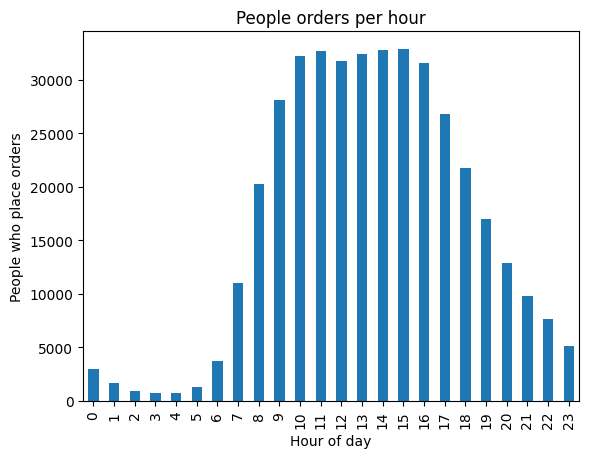

In [70]:
df_instacart_orders.groupby('order_hour_of_day')['user_id'].nunique().plot(kind='bar',title="People orders per hour", xlabel="Hour of day", ylabel= "People who place orders")
plt.show()

A partir del gráfico anterior evidenciamos una tendencia, en la madrugada, especificamente entre las 12 am y las 6 am no se hacen menos de 5000 ordenes, a partir de las 7 se presenta un incremento hasta más de 30000 ordenes que se sostiene a hasta las 4 pm para caer progresivamente al orden de 5000 ordenes a las 11 pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [71]:
orders_by_day = df_instacart_orders['order_dow'].value_counts().sort_index()

In [72]:
print(df_instacart_orders['order_dow'].value_counts().sort_index())

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


Generamos un objeto series en el cual se encuentra la cantidad de valores asociados con la columna "order_dow" además agrgamos el atributo .sort_index() para que el indice de "order_dow" que corresponde al valor de dicha columna en el dataframe se muestre en orden de 0-6 que corresponde a domingo-sabado entendiendo que cada valor en secuencia equivale a 1 día de la semana. Posteriormente imprimimos y evidenciamos la cantidad de veces que se encuentra cada valor.

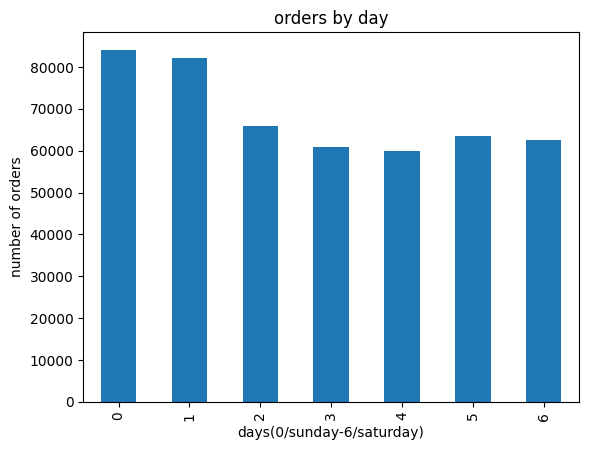

In [73]:
orders_by_day.plot(kind="bar",title="orders by day",xlabel="days(0/sunday-6/saturday)",ylabel="number of orders")
plt.show()

En la grafica anterior vemos que en general las personas compran más los días domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [74]:
df_instacart_orders.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


verificamos primero nuevamente el tipo de datos del Data Frame df_instacart_orders.

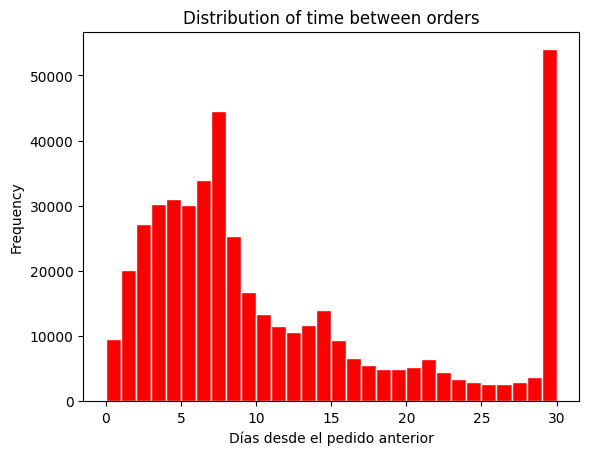

In [75]:
df_instacart_orders['days_since_prior_order'].dropna().plot(kind='hist',title= "Distribution of time between orders", bins=30 , color='red', edgecolor="white")
plt.xlabel("Días desde el pedido anterior")
plt.show()

En el grafico anterior se evidencia la distribución de la cantidad de pedidos con respecto a los días que pasaron desde el pedido anterio, podemos ver que la mayoría de los usuarios hacen un nuevo pedido dentro de los primeros 8 días, con picos notables en los días 6, 7 y 8. Existe un pico pronunciado en el día 30, lo que se puede asociar a que muchos usuarios hacen pedidos mensuales o que 30 días podría ser un valor limite superior en el registro de los datos.

In [76]:
df_instacart_orders['days_since_prior_order'].dropna().min()

0.0

al verificar el dato minimo, este corresponde a 0 por lo que puede asociarse a que el usuario hizo dos compras a distintas horas el mismo día.

In [77]:
df_instacart_orders['days_since_prior_order'].dropna().max()

30.0

El valor 30 días probablemente indica un tope en el registro de la plataforma. puede que la plataforma presenta un máximo en el campo para no registrar tiempos muy largo, en este caso por ejemplo luego de más de 60 días para volver a comprar igualmente la plataforma marcaria 30 días.


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [78]:
wed = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
sat = df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

Text(0.5, 0, 'hour')

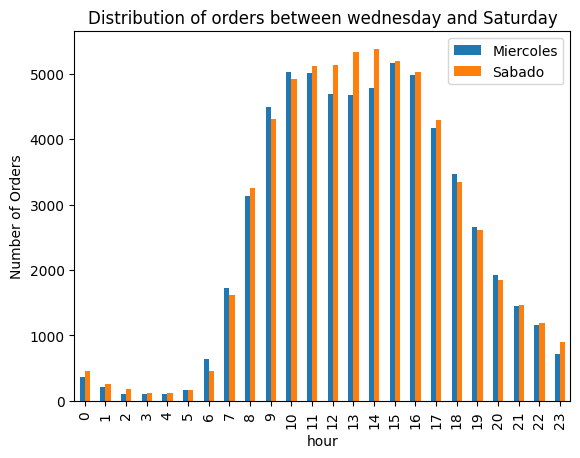

In [79]:
wed.name= "Miercoles"
sat.name="Sabado"
pd.concat([wed,sat],axis=1).plot(kind="bar",title="Distribution of orders between wednesday and Saturday", ylabel="Number of Orders")
plt.xlabel("hour")

Mis conclusiones con base en el grafico anterior son:
1.Tanto los miércoles como los sábados concentran la mayoría de los pedidos en el rango de las 10 a las 16 horas.
2.El pico máximo ocurre alrededor de las 12:00 - 13:00 hrs, para ambos días.
3.La forma general de las barras es muy parecida, lo que sugiere que los usuarios mantienen hábitos consistentes independientemente del día.Sin embargo, los miércoles tienden a tener ligeramente más pedidos en las horas centrales, mientras que los sábados se equilibran un poco más durante el día.
4.Entre las 0 y 6, el número de pedidos es muy bajo, debido a que son comunmente horas donde la mayoria de personas no están despiertas.
5.A partir de las 17:00 hrs, el volumen de pedidos comienza a disminuir progresivamente.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [80]:
order_by_client=df_instacart_orders.groupby('user_id')['order_number'].max().value_counts().sort_index()

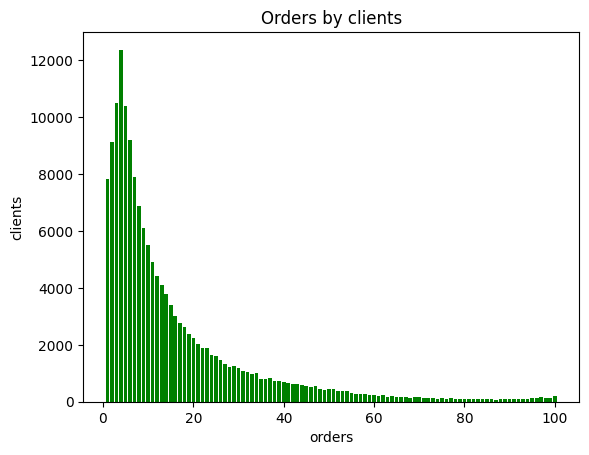

In [81]:
 plt.bar(order_by_client.index, order_by_client.values, color='green')
plt.xlabel("orders")
plt.ylabel("clients")
plt.title("Orders by clients")
plt.show()

Mis conclusiones son :
1.La mayoría de los usuarios han hecho pocos pedidos, con un gran pico alrededor de los 4 a 6 pedidos.
2.A medida que aumenta el número de pedidos, la cantidad de usuarios disminuye rápidamente.
3.Hay una pequeña cantidad de usuarios que han hecho muchos pedidos (hasta 100).

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [82]:
product_counts = df_order_products['product_id'].value_counts().head(20)

En la anterior linea de codigo, creamos un series a partir de el dataframe df_order_products y la columna "product_id" mostrando los valores de la columna, pero en este caso solo 20 valores.

In [83]:
top_products = pd.DataFrame({
    'product_id': product_counts.index,
    'order_count': product_counts.values
}).merge(df_products, on='product_id')

en la anterior linea de codigo, creamos un dataframe llamado top_products el cual se relaciona con los indices y valores del series previmanete (product_counts) luego creamos un merge interno con el dataframe de productos(df_products) por medio de la columna product_id

In [84]:
print(top_products[['product_id', 'product_name', 'order_count']])

    product_id              product_name  order_count
0        24852                    BANANA        66050
1        13176    BAG OF ORGANIC BANANAS        53297
2        21137      ORGANIC STRAWBERRIES        37039
3        21903      ORGANIC BABY SPINACH        33971
4        47209      ORGANIC HASS AVOCADO        29773
5        47766           ORGANIC AVOCADO        24689
6        47626               LARGE LEMON        21495
7        16797              STRAWBERRIES        20018
8        26209                     LIMES        19690
9        27845        ORGANIC WHOLE MILK        19600
10       27966       ORGANIC RASPBERRIES        19197
11       22935      ORGANIC YELLOW ONION        15898
12       24964            ORGANIC GARLIC        15292
13       45007          ORGANIC ZUCCHINI        14584
14       39275       ORGANIC BLUEBERRIES        13879
15       49683            CUCUMBER KIRBY        13675
16       28204        ORGANIC FUJI APPLE        12544
17        5876             O

en la linea de codigo anterior imprimimos el dataframe creado que nos muestra las columnas product_id, product_name y order_count que corresponde al numero de veces que se pidio este producto. en este sentido se muestra que el producto más pedido es "banana" con 66050 ordenes

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [85]:
items_per_order = df_order_products.groupby('order_id').size()
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


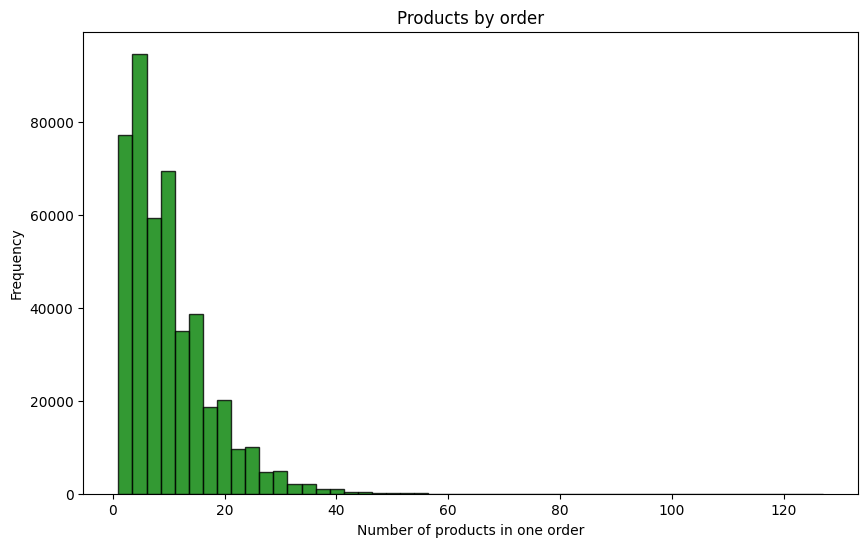

In [86]:
items_per_order.plot.hist(bins=50,figsize=(10, 6),color='green',edgecolor='black',alpha=0.8,title='Products by order')
plt.xlabel('Number of products in one order')
plt.ylabel('Frequency')
plt.show()

A partir de la grafica anterior, verificamos que la gran mayoría de los pedidos contiene pocos artículos (entre 1 y 10 productos). A medida que aumenta la cantidad de artículos por pedido, la frecuencia disminuye en gran medida. Tambien evidenciamos que el valor más frecuente está alrededor de los 5 productos por pedido.
tenemos que hay muy pocos pedidos con más de 40 productos.
De acuerdo con lo anterior, se concluye que los clientes generalmente hacen compras pequeñas o medianas

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [87]:
reordered = df_order_products[df_order_products['reordered'] == 1]

In [88]:
reordered_counts = reordered['product_id'].value_counts().head(20).reset_index()

In [89]:
reordered_counts.columns = ['product_id', 'reorder_count']

In [90]:
top_reordered = reordered_counts.merge(df_products[['product_id', 'product_name']], on='product_id')

In [91]:
print(top_reordered)

    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16        8277           8836  APPLE HONEYCRISP 

Se muestra de forma adecuada los 20 productos que se piden con más frecuencia y entre estos el que más se destaca es "Banana" pero en general se identifiica que los productos que se piden con mayor frecuencia son principalemnte frutas y verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [92]:
total_orders = df_order_products.groupby('product_id').size().rename('total_orders')

generamos un series llamado "total-orders" el cual calcula cuántas veces fue pedido cada producto. inicialemnte se agrupa el DataFrame por "product_id" , se verifica cuantas filas hay en cada grupo con .size(), lo que se refiere a cuantas veces aparece cada producto en los pedidos y modificamos el nombre del series a "total_order" para que se entienda el procesamiento

In [93]:
reorders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size().rename('reorder_count')

Generamos un series llamado "reorders" que calcula cuántas veces fue reordenado cada producto, inicialemnte filtramos el dataframe df_order_prodcuts para que nos muestre solo cuando el producto fue reordenado, luego se agrupa el subconjutno filtrado por "product_id", la herramienta size() cuenta cuántas veces aparece cada producto en los reordenados. por ultimo se renombra el resultado para que la columna se llame reorder_count

In [94]:
reorder_rate = pd.concat([total_orders, reorders], axis=1).fillna(0)

Usamos la herramienta concat() para unir los dos series previamente creados por las columnas con el aparametro (axis=1) , adicionalemnte se tiene en cuenta que si un producto no fue ordenado su reorder_count sera Nan por lo que llenamos este valor con 0 con la herramienta fillna(0).

In [95]:
reorder_rate['reorder_rate'] = reorder_rate['reorder_count'] / reorder_rate['total_orders']

Ya con los datos de ambos series en un dataframe, modificamos la columna "reorder_rate" para que corresponda con la tasa de repeticón de cada producto, que se asocia con la proporción de cuántas veces el producto fue reordenado sobre cuántas veces en total se pidió ese producto.

In [96]:
reorder_rate = reorder_rate.reset_index().merge(df_products[['product_id', 'product_name']], on='product_id')

la linea de codigo anterior convierte el índice del DataFrame reorder_rate en una columna y une el dataframe creado con el dataframe df_products en sus columnas "product_id" y "product_name" a partir de la columna product_id de ambos.

In [97]:
print(reorder_rate.head())

   product_id  total_orders  reorder_count  reorder_rate  \
0           1           280          158.0      0.564286   
1           2            11            0.0      0.000000   
2           3            42           31.0      0.738095   
3           4            49           25.0      0.510204   
4           7             2            1.0      0.500000   

                                        product_name  
0                         CHOCOLATE SANDWICH COOKIES  
1                                   ALL-SEASONS SALT  
2               ROBUST GOLDEN UNSWEETENED OOLONG TEA  
3  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...  
4                     PURE COCONUT WATER WITH ORANGE  


a partir del procesamiento obtenemos un DataFrame que nos muestra para todos los productos cual es la proporción de la cantidad de vesces que se pidio y que se vuelve a pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

usaremos dos dataframes originales df_order_products y df_instacart_orders

In [98]:
df_merged = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id')

Creamos un dataframe que correponda con la fusión de los dataframes order_prodcuts y instacar_orders por la columna "order_id"

In [99]:
user_total = df_merged.groupby('user_id').size().rename('total_products')

la anterior linea de codigo, calcula por usuario, cuántos productos ha pedido en total 

In [100]:
user_reordered = df_merged[df_merged['reordered'] == 1].groupby('user_id').size().rename('reordered_products')

la anterior linea de codigo calcula, por usuario, cuántos productos que pidió ya los había pedido antes

In [101]:
user_repeat_rate = pd.concat([user_total, user_reordered], axis=1).fillna(0)

Usamos la herramienta concat() para unir los dos series previamente creados por las columnas con el aparametro (axis=1)

In [102]:
user_repeat_rate['repeat_rate'] = user_repeat_rate['reordered_products'] / user_repeat_rate['total_products']

Modificamos el valor de la columna "repeat_rate" del dataframe filtrado para que corresponda al numero de productos reaordenados por cliente sobre el total de los productos. Es decir, de todos los productos que un cliente ha comprado, qué proporción eran productos que ya había pedido antes.

In [103]:
print(user_repeat_rate.head(10))

         total_products  reordered_products  repeat_rate
user_id                                                 
2                    26                 1.0     0.038462
4                     2                 0.0     0.000000
5                    12                 8.0     0.666667
6                     4                 0.0     0.000000
7                    14                13.0     0.928571
11                   15                 3.0     0.200000
12                   12                 3.0     0.250000
13                   23                13.0     0.565217
14                   61                22.0     0.360656
15                   13                 7.0     0.538462


verificamos la proporción de recompraa  de los productos por cliente. La mayoría de los usuarios tienden a repetir parte de sus compras, es decir, no siempre prueban productos nuevos. Algunos repiten casi todo lo que compran (tasa cercana a 1). Esto puede reflejar hábitos de compra rutinarios donde siempre se compran los mismo productos por un cliente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Usamos el datafram df_order_products para responder esta pregunta

In [104]:
first_added = df_order_products[df_order_products['add_to_cart_order'] == 1]

este procesamiento corresponde al filtrado del dataframe en relación con las filas donde la columna "add_to_cart_order" es igual a 1 lo que nos dice que fue el primero de los productos agregados a la order.

In [105]:
first_counts = first_added['product_id'].value_counts().head(20)

la anterior linea de codigo nos da un series que Esta línea cuenta cuántas veces cada producto fue el primero en añadirse al carrito y luego devuelve los 20 productos más frecuentes.

In [106]:
first_counts_df = first_counts.reset_index()
first_counts_df.columns = ['product_id', 'first_add_count']

inicialmente transformamos el series creado anteriormente a un dataframe estructurado y reseteamos los inidices del dataframe moviendo el valor a una columna a otra columna y luego renombramos las columnas del DataFrame resultante para que tengan nombres más descriptivos:



In [107]:
top_first_products = first_counts_df.merge(df_products[['product_id', 'product_name']], on='product_id')

la anterior linea de codigo, fusiona el DataFrame first_counts_df con el DataFrame df_products para agregar el nombre de cada producto "product_name" al conteo de veces que fue el primero en añadirse al carrito.

Escribe aquí tus conclusiones

In [108]:
top_first_products = top_first_products.sort_values(by='first_add_count', ascending=False)

la anterior linea de codigo, ordena la fusión de dataframes anterior en orden descente por los valores de la columna "first_add_count" para que se muestre cuales son los 20 principales articulos que las personas ponen primero en sus carritos

In [109]:
top_first_products

,product_id,first_add_count,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


vemos que el principal articulo que las personas agregan como primer articulo al carrito es banana

### Conclusion general del proyecto:

cómo conclusiones generales del proyecto tenemos que:
1.hicimos un preprocesamiento adecuado de los datos.
2.en el preprocesamiento tuvismo un buen acercamiento a los datos que nos pemite ver con que estamos trabajando.
3.ya en el procesamiento de los datos realizamos analisis para verificar por ejemplo:
-la cantidad de productos por pedido, Identificamos los productos más recurrentes
-Medimos cuántas veces se volvió a pedir cada producto respecto a todas las veces que fue pedido.
-Calculamos cuántos productos de un usuario fueron repetidos.
etc
4.Usamos todas las herramientas de la teoria y generamos graficos de barras e histogramas.
5.Pienso que fue un poco retador el proyecto pero muy interesante para ampliar la perspectiva respecto al trabajo como analista de datos.